# Review analysis
This file outlines a comprehensive workflow for textual analysis and sentiment exploration of reviews scraped from online platforms. Key steps include data preprocessing, TF-IDF vectorization to identify top terms, and sentiment analysis using TextBlob. The results are visualized through heatmaps and bar charts, highlighting emotional patterns and key terms across episodes. Additionally, it integrates community detection, emotional distribution comparisons, and graphical visualizations to provide nuanced insights into audience reception and narrative resonance.

In [2]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import re

# Function to replace specific phrases with single tokens
def join_phrases(text):
    return re.sub(r'\bba sing se\b', 'ba_sing_se', text, flags=re.IGNORECASE)

# Load the stop words from the provided text file
stop_words_file = 'reviews_filter.txt'
with open(stop_words_file, 'r') as file:
    custom_stop_words = file.read().splitlines()

# Folder containing review CSV files
reviews_folder = 'reviews'
output_folder = 'tfidf_results'
os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

# Iterate through all files in the reviews folder
for filename in os.listdir(reviews_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(reviews_folder, filename)
        
        # Load the CSV file
        scraped_data_df = pd.read_csv(file_path)

        # Extract the 'Review' column and clean the text
        if 'Review' in scraped_data_df.columns:
            scraped_data_df['Consolidated_Review'] = scraped_data_df['Review'].apply(
                lambda x: join_phrases(x) if pd.notna(x) else ""
            )
            all_content = scraped_data_df['Consolidated_Review'].dropna().tolist()
        else:
            print(f"The column 'Review' does not exist in {filename}. Skipping.")
            continue

        # Initialize the TF-IDF Vectorizer
        tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_features=20, ngram_range=(1, 2))
        tfidf_matrix = tfidf_vectorizer.fit_transform(all_content)

        # Create a DataFrame for TF-IDF scores
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

        # Summarize the top TF-IDF terms
        top_tfidf_terms = tfidf_df.sum(axis=0).sort_values(ascending=False)
        top_tfidf_terms_df = top_tfidf_terms.reset_index()
        top_tfidf_terms_df.columns = ['Term', 'Score']

        # Add sentiment scores to the original DataFrame
        scraped_data_df['Sentiment'] = scraped_data_df['Consolidated_Review'].apply(
            lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else 0
        )

        # Calculate average sentiment
        average_sentiment = scraped_data_df['Sentiment'].mean()

        # Save TF-IDF results
        tfidf_output_file = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_tfidf.csv")
        top_tfidf_terms_df.to_csv(tfidf_output_file, index=False)

        # Save sentiment results
        sentiment_output_file = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_sentiment.csv")
        sentiment_summary = pd.DataFrame({'Average Sentiment': [average_sentiment]})
        sentiment_summary.to_csv(sentiment_output_file, index=False)

        print(f"Processed {filename}: TF-IDF and sentiment results saved.")

print("All files processed and results saved.")


/Users/aya/Desktop/avatar_project/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shouldn', 've', 'wasn', 'weren', 'will', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/Users/aya/Desktop/avatar_project/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shouldn', 've', 'wasn', 'weren', 'will', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/Users/aya/Desktop/avatar_project/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. To

Processed The_Headband_reviews.csv: TF-IDF and sentiment results saved.
Processed The_Great_Divide.csv: TF-IDF and sentiment results saved.
Processed The_Painted_Lady.csv: TF-IDF and sentiment results saved.
Processed Appas_Lost_Days.csv: TF-IDF and sentiment results saved.
Processed Zuko_Alone.csv: TF-IDF and sentiment results saved.
Processed Sokkas_Master.csv: TF-IDF and sentiment results saved.
All files processed and results saved.


/Users/aya/Desktop/avatar_project/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shouldn', 've', 'wasn', 'weren', 'will', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


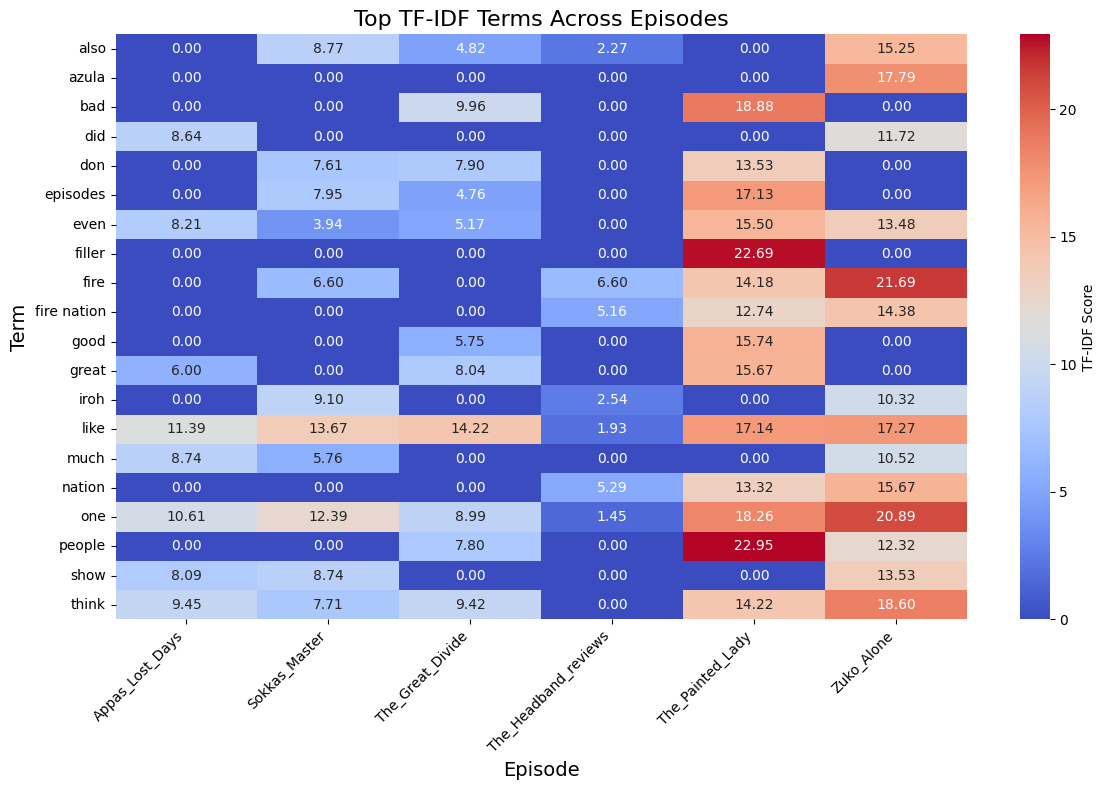

/var/folders/0q/x2dyyz5d7xs7zzrfhj8l86840000gp/T/ipykernel_13362/1142283520.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_df, x="Episode", y="Average Sentiment", palette="viridis")


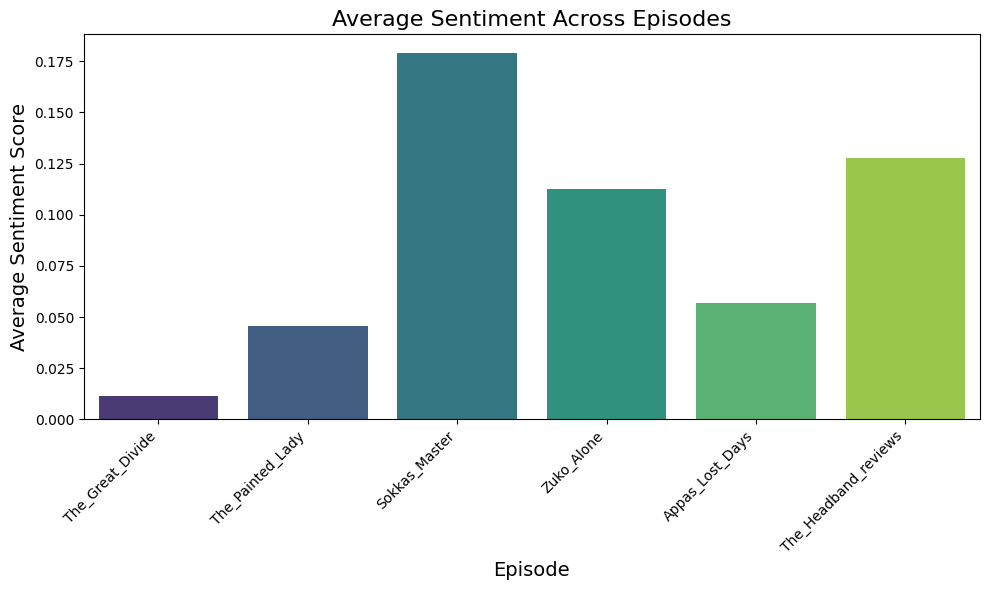

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to folders
tfidf_folder = "tfidf_results"

# Combine all TF-IDF results
tfidf_data = []
for file in os.listdir(tfidf_folder):
    if file.endswith("_tfidf.csv"):
        file_path = os.path.join(tfidf_folder, file)
        episode_name = file.replace("_tfidf.csv", "")
        tfidf_df = pd.read_csv(file_path)
        tfidf_df["Episode"] = episode_name  # Add episode name
        tfidf_data.append(tfidf_df)

# Combine all TF-IDF data
tfidf_combined = pd.concat(tfidf_data, ignore_index=True)

# Summarize top terms across all episodes
top_terms = (
    tfidf_combined.groupby("Term")["Score"]
    .sum()
    .sort_values(ascending=False)
    .head(20)  # Adjust the number of terms as needed
    .index.tolist()
)

# Filter combined TF-IDF data to include only top terms
tfidf_top = tfidf_combined[tfidf_combined["Term"].isin(top_terms)]

# Pivot for heatmap
tfidf_pivot = tfidf_top.pivot_table(index="Term", columns="Episode", values="Score", fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "TF-IDF Score"})
plt.title("Top TF-IDF Terms Across Episodes", fontsize=16)
plt.ylabel("Term", fontsize=14)
plt.xlabel("Episode", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Sentiment comparison
sentiment_data = []
for file in os.listdir(tfidf_folder):
    if file.endswith("_sentiment.csv"):
        file_path = os.path.join(tfidf_folder, file)
        episode_name = file.replace("_sentiment.csv", "")
        sentiment_df = pd.read_csv(file_path)

        # Check if a column exists for sentiment scores
        if "Average Sentiment" in sentiment_df.columns:
            sentiment_score = sentiment_df["Average Sentiment"].mean()
        elif "Polarity" in sentiment_df.columns:  # Adjust based on your file's column name
            sentiment_score = sentiment_df["Polarity"].mean()
        else:
            print(f"Sentiment column not found in {file}. Skipping.")
            continue

        sentiment_data.append({"Episode": episode_name, "Average Sentiment": sentiment_score})

# Convert sentiment data to a DataFrame
sentiment_df = pd.DataFrame(sentiment_data)

# Plot sentiment comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_df, x="Episode", y="Average Sentiment", palette="viridis")
plt.title("Average Sentiment Across Episodes", fontsize=16)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.xlabel("Episode", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### **Key Observations**

1. **"Sokka’s Master"**  
   - **"Like"** scores high at 13.67, showing strong audience admiration for Sokka’s growth. Discussions reflect appreciation for its uplifting, character-focused narrative.

2. **"Appa’s Lost Days"**  
   - **"Like"** (11.39) and **"good"** (6) indicate positive but restrained discussions. The heavy emotional tone likely tempered the enthusiasm despite its narrative importance.

3. **"The Great Divide"**  
   - High **"like"** (14.22) and **"bad"** (9.96) scores reflect polarized opinions, with frequent criticism about its lack of depth, earning its reputation as a weaker episode.

4. **"The Headband"**  
   - Surprisingly low **"like"** scores suggest that while the episode is appreciated, it lacked the passionate engagement seen in others.

5. **"The Painted Lady"**  
   - Divisive reception is evident with high **"like"** (17.14) and **"bad"** (18.88) scores. Some valued its moral themes, while others dismissed it as **"filler"** (22.69).

6. **"Zuko Alone"**  
   - The highest **"like"** score (18.26) underscores the audience’s connection to Zuko’s emotional journey and moral struggles, solidifying its beloved status.

### **Sentiment Analysis**

1. **"Sokka’s Master"**: Highest sentiment reflects appreciation for its humor, growth, and triumph.  
2. **"The Headband"**: Strong sentiment reflects the appreciation for the charm and good vibes of the episode.  
3. **"Zuko Alone"**: Strong sentiment mirrors respect for its emotional depth and darker themes.  
4. **"The Painted Lady"**: 2nd lowest sentiment highlights mixed feelings about pacing and Katara’s actions.  
5. **"Appa’s Lost Days"**: Lower sentiment reflects the discomfort of its sorrowful narrative.  
6. **"The Great Divide"**: The lowest score aligns with its reputation as uninspired filler.  


### **Broader Insights**

- **Character-Driven Success**: Episodes like "Sokka’s Master" and "Zuko Alone" confirm the audience’s love for personal, growth-centered stories.  
- **Emotional Balance Matters**: A mix of humor, depth, and stakes leads to stronger audience reception, as seen earlier in "The Siege of the North" and "Sozin’s Comet."  
- **Polarization and Critique**: Divisive episodes like "The Painted Lady" show how pacing and moral ambiguity can spark debate, while "The Great Divide" illustrates how weak stakes fail to engage.




While the initial network analysis and community detection offered valuable visualizations, they didn’t provide many surprises, largely reaffirming what we already knew about the centrality of Team Avatar and the interconnectedness of the story’s arcs. However, it’s the emotional patterns revealed in our deeper analysis that bring a surprising layer of nuance to our findings.

Character-centric episodes with emotional distributions similar to high-rated, action-packed episodes like The Siege of the North and Sozin’s Comet—episodes balancing trust, anticipation, and fear—perform exceptionally well and garner broad audience consensus. Episodes like Sokka’s Master, The Headband and Zuko Alone prove that such balance is not exclusive to action-packed climaxes; it can also elevate quieter, character-driven narratives to fan-favorite status.

In contrast, character-centric episodes like The Painted Lady and The Great Divide, whose emotional distributions deviate from this balance, are perceived as weaker and more divisive. This subtle but significant distinction highlights how both emotional resonance and structural alignment with beloved episodes can determine an episode’s reception. It’s a nuanced reminder that even within the same storytelling framework, the emotional “formula” matters just as much as the narrative focus.

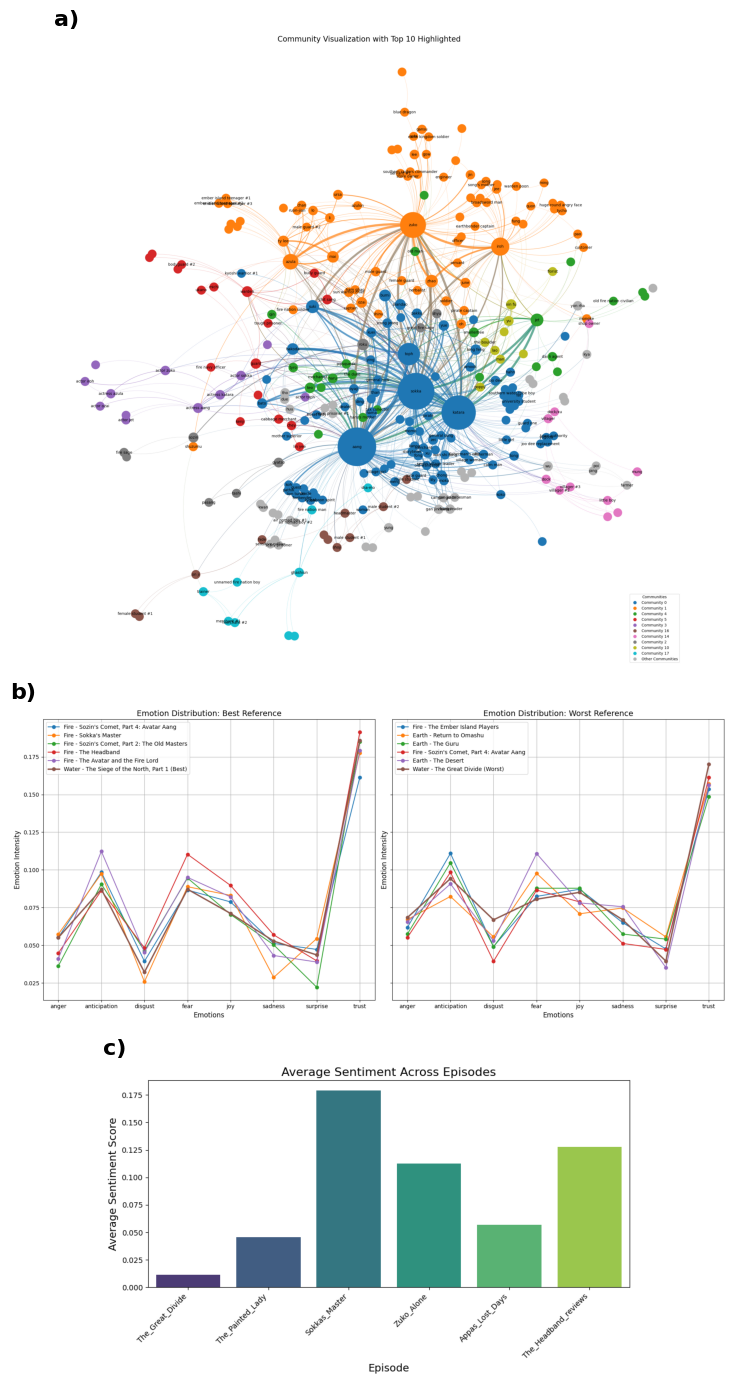

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the file paths for the three PNG graphs
file_paths = [
    'communities.png',
    'emotion_dist.png', 
    'reviews_sentimens.png'
]

# Titles for the subplots
titles = ['a)', 'b)', 'c)']

# Create a figure for the combined graphs with custom subplot heights
fig, axes = plt.subplots(
    3, 1, figsize=(18, 14),  # Adjust overall figure size
    gridspec_kw={'height_ratios': [2, 1, 1]}  # Allocate more space to the first graph
)

# Iterate through file paths and axes to load and plot each graph
for ax, file_path, title in zip(axes, file_paths, titles):
    image = mpimg.imread(file_path)
    ax.imshow(image)
    ax.axis('off')  # Hide axes for a cleaner look
    ax.set_title(title, loc='left', fontsize=16, weight='bold')  # Add title

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()
